### Intro
Script making pairwise correlation of significant lipids found from the multivariate and univariate analysis conducted in R.

### Import

In [1]:
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt
import numpy as np

### Load and transform data

In [2]:
# Load data set
lipidomics_data_tidy = pd.read_csv("../data/02_lipidomics_data_tidy.csv")
sign_lipids = pd.read_csv("../data/07_sign_lipids.csv", index_col=0)

In [3]:
# Log2 transform values
num = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
for n in [n for n in lipidomics_data_tidy.columns if lipidomics_data_tidy[n].dtype in num]:
    lipidomics_data_tidy[n] = np.log10(lipidomics_data_tidy[n])

### Pairwise comparison of significant lipids

In [4]:
# List of significant lipids
ll = sign_lipids.index.tolist()
ll.append('Condition')

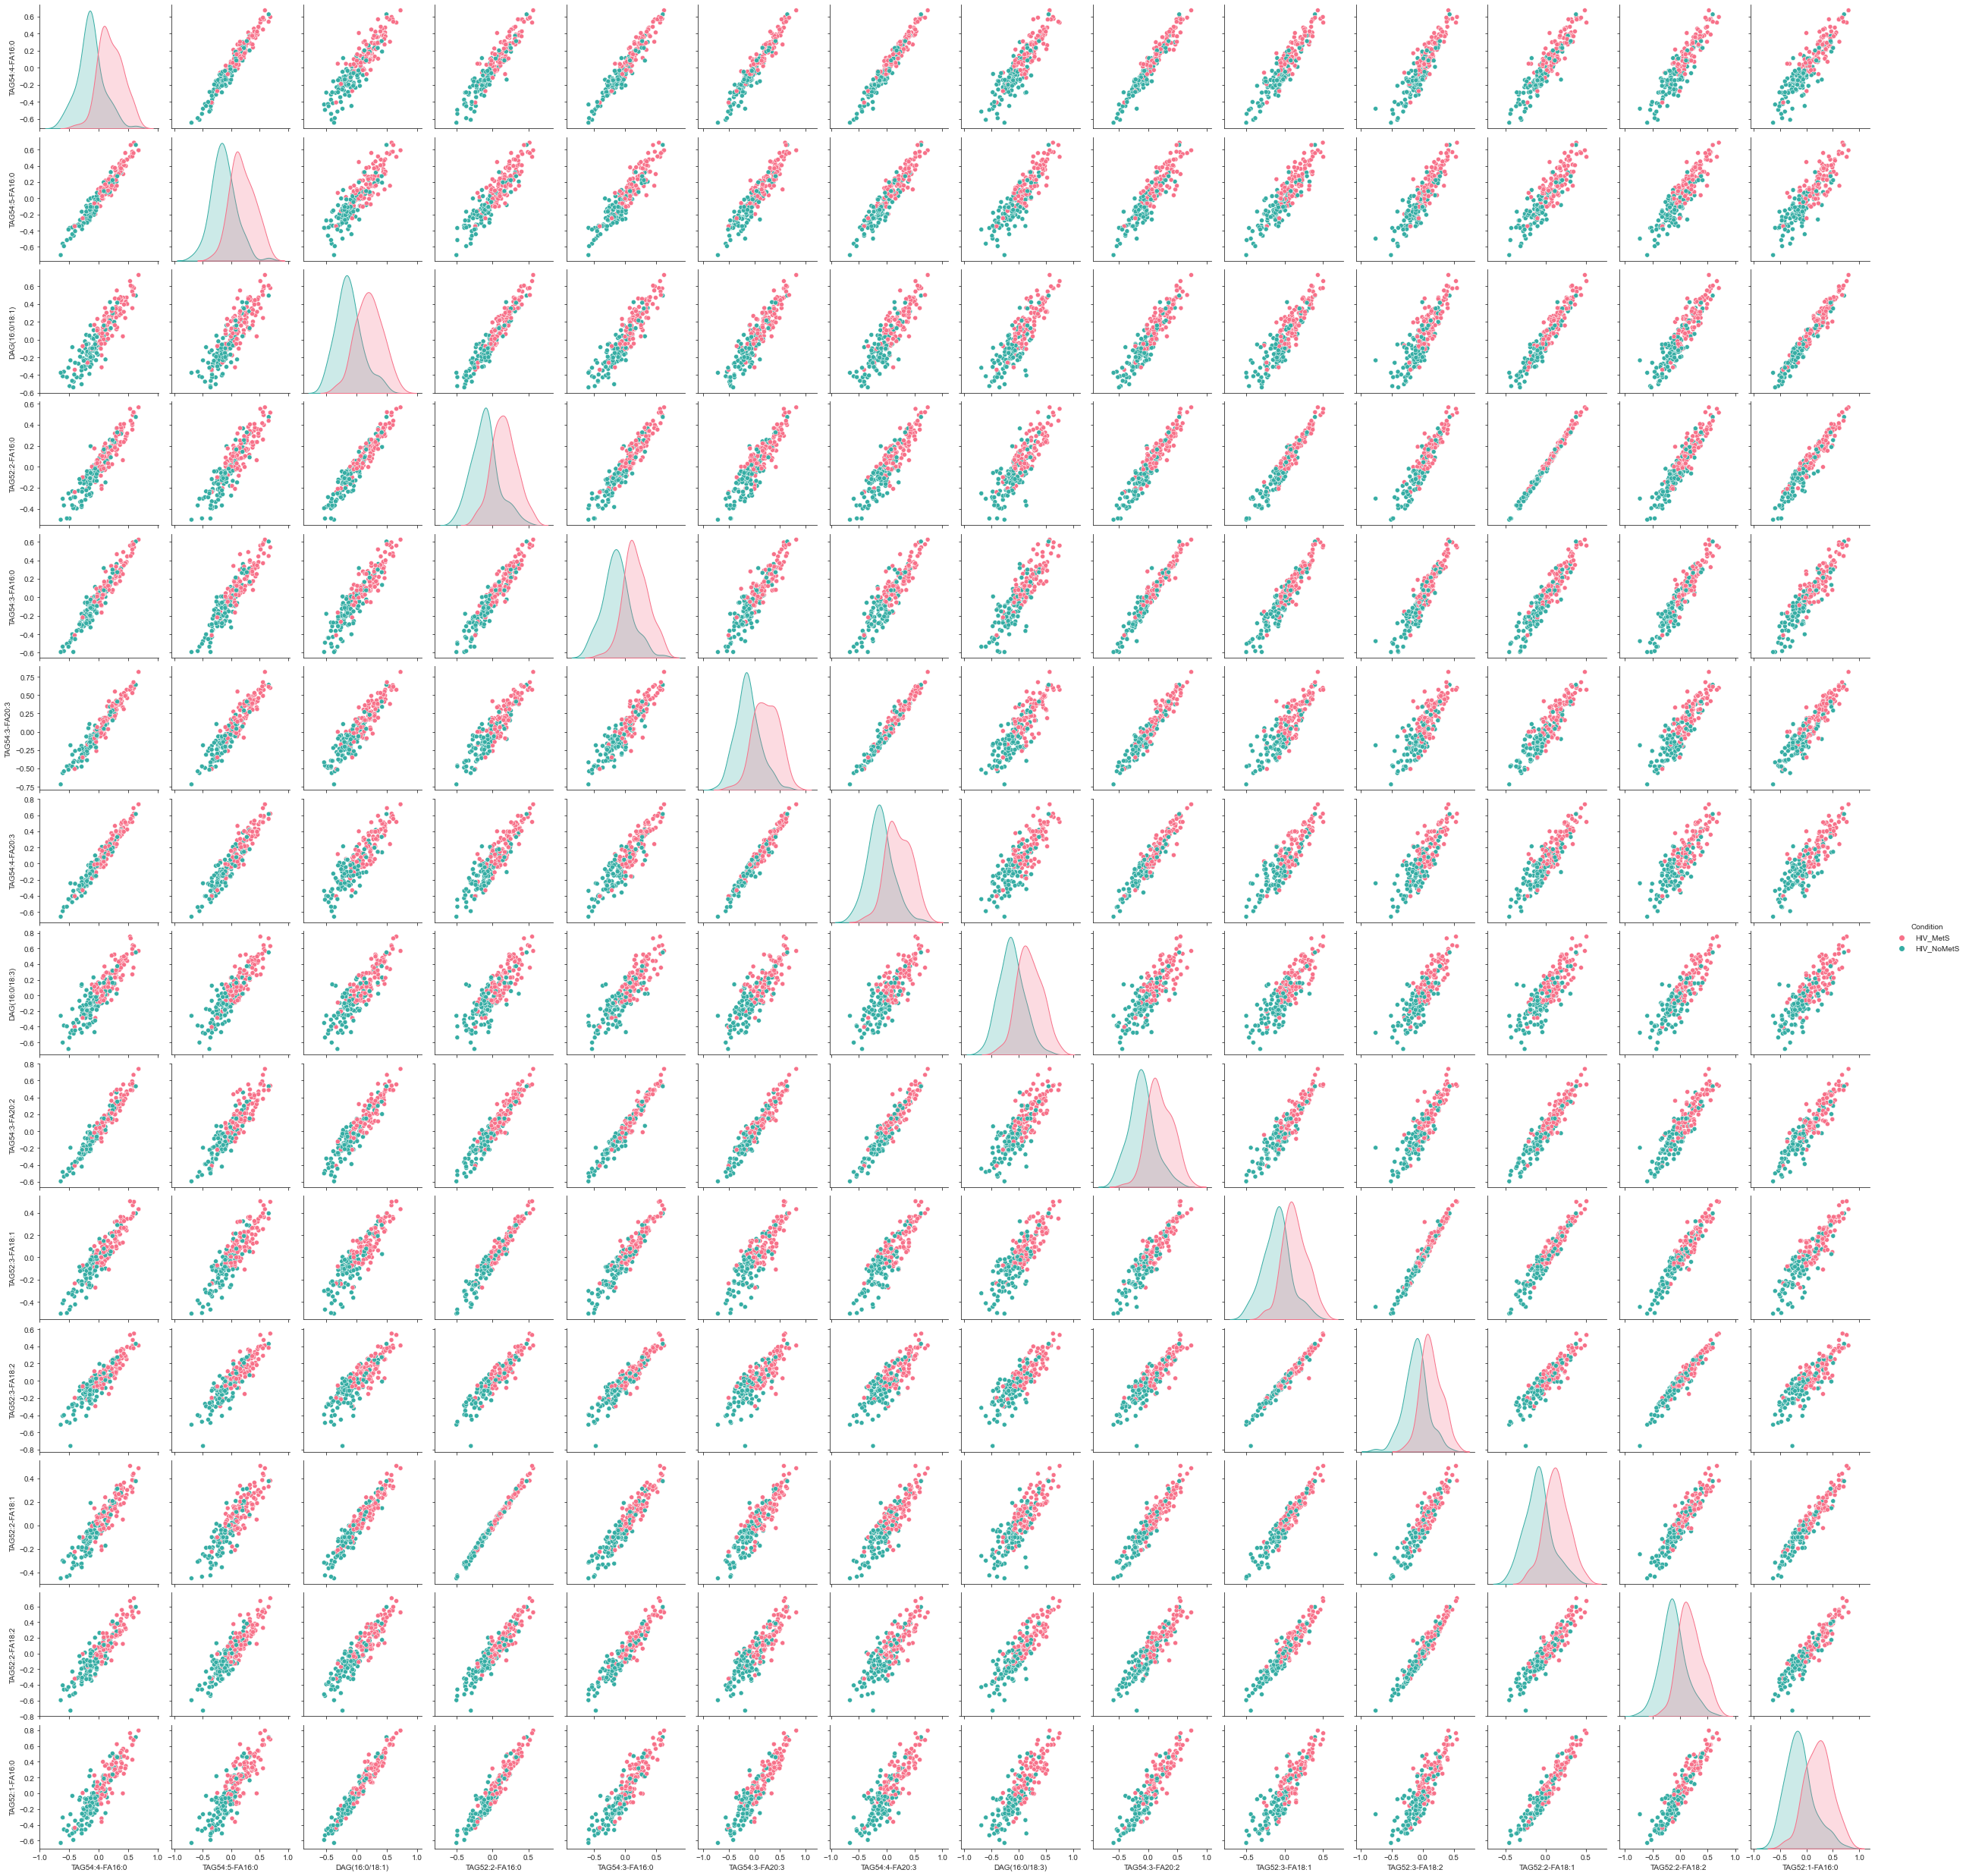

In [5]:
# Pairwise comparison of all the lipids
sb.set_style("ticks")
pair_plot = sb.pairplot(lipidomics_data_tidy[ll],
            hue = 'Condition',
            diag_kind = "kde",
            kind = "scatter",
            palette = "husl")
plt.show()

In [6]:
# Save pairwise plot
pair_plot.savefig('../results/07_pairwiseplot_significant_lipids.png', dpi = 200)

In [7]:
# List of significant lipids
ll = sign_lipids.index.tolist()
ll.append('Condition')

In [8]:
# Heatmap 
df_lip = lipidomics_data_tidy[ll].set_index(lipidomics_data_tidy[ll].columns[-1])
df_lip = df_lip.sort_index()
df_lip = df_lip.transpose()

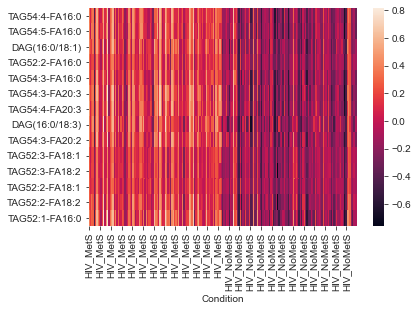

In [9]:
ax = sb.heatmap(df_lip)
plt.show()

In [10]:
# Save heatmap plot
ax.figure.savefig('../results/07_heatmap_significant_lipids.png', dpi = 300)